The directory harrypotter contains 7 books from the Harry Potter series. Answer the following questions using this data:

a) implement a function find_all_characters() that takes the name of a book (this could be the filename of the file containing the book) and any other parameters you deem necessary, and return the list of characters that appear in the book. 

b) implement a function find_imp_characters() that takes the list obtained in (a), an optional parameter top_x that defaults to 20, and any other parameters you deem necessary, and returns a list of the most important characters in the book. [Note: clearly state your criterion for measuring importance in your comments] 

c) create a dispersion_plot of 20-most important characters in the first book. Name the 5 most important characters based on your dispersion_plot. 

d) implement a function find_mentions() that takes the name of a book, name of a character and returns a list of sentences where this character appears. 

e) implement a function good_person_score() that takes the list of sentences where a character is mentioned, the name of the character, and any other parameters you deem necessary, and return a numeric value.

f) implement a function good_and_bad_guys() that takes the name of a book and returns a dictionary of key-value pairs where the key is the name of a character and the value is their score. 

In [16]:
# Answer for a)
import nltk
nltk.download('maxent_ne_chunker')
from nltk.corpus import PlaintextCorpusReader
    
def find_all_characters(root_name, book_name):
    hp_root = root_name
    hp_files = book_name
    hp_data = PlaintextCorpusReader(hp_root, hp_files)
    text = hp_data.raw()
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    return get_labeled_text(striptext, 'PERSON')

def get_labeled_text(text,label_type='ALL'):
    import nltk
    en={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized)
                chunked = nltk.ne_chunk(tagged)
                for tree in chunked:
                    if hasattr(tree, 'label'):
                        if not label_type == "ALL":
                            if not tree.label() == label_type:
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves())
                        en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
    except Exception as e:
        return str(e)
    return en

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/gemini/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [17]:
book1_characters = find_all_characters('/Users/gemini/Desktop/Python4523/final 练习/harrypotter', "Book1.txt")

In [18]:
# Answer for b)
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
nltk.download('stopwords')

# I use the frequency of the character exist in the senteces as the importancy score.
def find_imp_characters(book_characters, root_name, book_name, top_x = 20):
#     book_characters = find_all_characters(root_name, book_name)
    import nltk
    from nltk.corpus import PlaintextCorpusReader
    book_characters = book_characters.keys()
    hp_root = root_name
    hp_files = book_name
    hp_data = PlaintextCorpusReader(hp_root, hp_files)
    text = hp_data.raw()
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    character_list = []
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    for sentence in sentences:
        for character in book_characters:
            if character in sentence:
                character_list.append(character)
    
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    character_freq = FreqDist(character_list).most_common(top_x)
    return character_freq

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gemini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
book1_import = find_imp_characters(book1_characters,'/Users/gemini/Desktop/Python4523/final 练习/harrypotter', "Book1.txt")

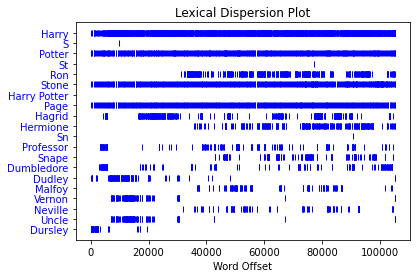

In [20]:
# Answer for c)
book1_important = []
for i in range(20):
    book1_important.append(book1_import[i][0])


import nltk
from nltk.corpus import PlaintextCorpusReader
hp_root = '/Users/gemini/Desktop/Python4523/final 练习/harrypotter'
hp_files = "Book1.txt"
hp_data = PlaintextCorpusReader(hp_root, hp_files)
text = hp_data.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

from nltk import word_tokenize
words = word_tokenize(striptext)
from nltk.draw.dispersion import dispersion_plot
dispersion_plot(words, book1_important)

The most important 5 characters are Harry Potter, Stone, Ron, Hagrid, Hermione 

In [22]:
# Answer for d)
file_root='/Users/gemini/Desktop/Python4523/final 练习/harrypotter'
text_list=[]
book_data = PlaintextCorpusReader(file_root,'Book1.txt')
text = book_data.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
for i in nltk.Text(sent_tokenize(striptext)):
    if 'Harry' in i:
        text_list.append(i)
print(text_list)

['Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  Page | 2 Harry Potter and the Philosophers Stone - J.K. Rowling   met for several years; in fact, Mrs. Dursley pretended  she didn’t have a sister, because her sister and her  good-for-nothing husband were as unDursleyish as it  was possible to be.', 'Mr. Dursley blinked and stared at  Page | 3 Harry Potter and the Philosophers Stone - J.K. Rowling    the cat.', 'He made several important telephone  Page | 4 Harry Potter and the Philosophers Stone - J.K. Rowling    calls and shouted a bit more.', '“The Potters, that’s right, that’s what I heard — ”  “ — yes, their son, Harry — ”  Mr. Dursley stopped dead.', 'He was sure there were lots  of people called Potter who had a son called Harry.', 'Come to think of it, he wasn’t even sure his nephew  was called Harry.', 'Page | 5 Harry Potter and the Philosophers Stone - J.K. Rowling    He found it a lot harder to concentrate on drills that  afternoon and when he left the building at fi

In [31]:
# Answer for e)
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def good_person_score(text,word,lower=True):
    analyzer = SentimentIntensityAnalyzer()
    pos = 0
    for sentence in text_list:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(text_list))
    return pos

In [32]:
good_person_score(text_list, 'Hagrid')

0.055710884353741476

In [ ]:
# Answer for d)
def good_and_bad_guys(root_name, book_name):
    characters = find_all_characters(root_name, book_name)
    
    characters = characters.keys()
    result = {}
    for character in characters:
        score = good_person_score(striptext, character)
        result[character] = score
    return result